## 一起plot

C:\Users\Lxj\AppData\Local\Temp\ipykernel_16736\4279407357.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\Users\Lxj\AppData\Local\Temp\ipykernel_16736\4279407357.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\Users\Lxj\AppData\Local\Temp\ipykernel_16736\4279407357.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)
C:\User

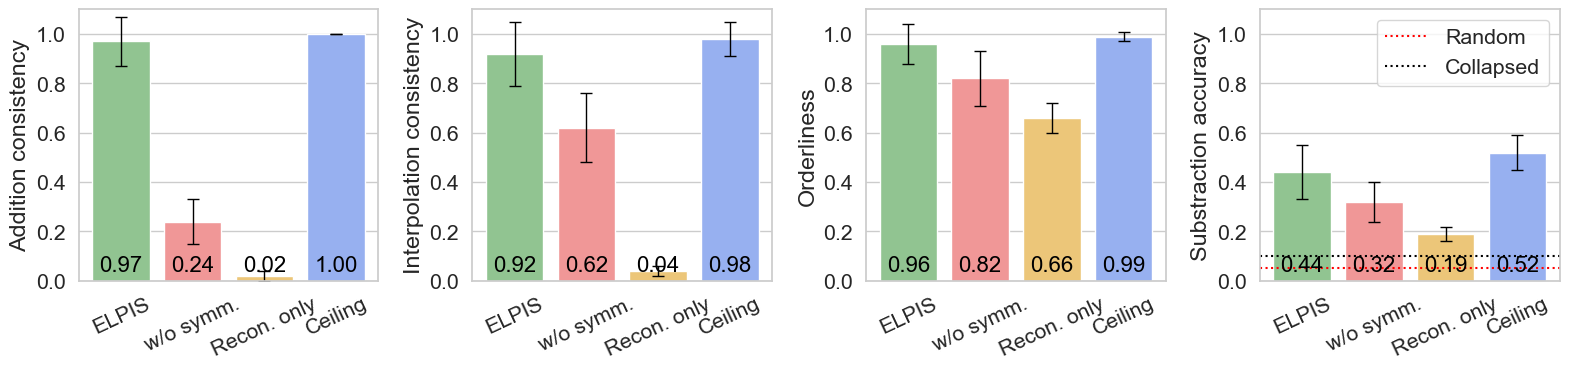

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# ===== 数据（均值与标准差）=====
exps = ["ELPIS", "w/o symm.", "Recon. only", "Ceiling"]
metrics = ["Addition consistency", "Interpolation consistency", "Orderliness", "Substraction accuracy"]

means = {
    "Addition consistency":        [0.97, 0.24, 0.02, 1.00],
    # "Interpolation consistency":   [0.88, 0.42, 0.01, 0.93], # mode dict accu
    "Interpolation consistency":   [0.92, 0.62, 0.04, 0.98], # selection accu
    "Orderliness":                 [0.96, 0.82, 0.66, 0.99],
    "Substraction accuracy":       [0.44, 0.32, 0.19, 0.52],
}
stds = {
    "Addition consistency":        [0.10, 0.09, 0.02, 0.00],
    # "Interpolation consistency":   [0.17, 0.15, 0.01, 0.08],  # mode dict accu
    "Interpolation consistency":   [0.13, 0.14, 0.02, 0.07],  # selection accu
    "Orderliness":                 [0.08, 0.11, 0.06, 0.02],
    "Substraction accuracy":       [0.11, 0.08, 0.03, 0.07],
}

# 转成长表（含 mean 和 std）
rows = []
for m in metrics:
    for e, mu, sd in zip(exps, means[m], stds[m]):
        rows.append({"metric": m, "exp": e, "mean": mu, "std": sd})
df = pd.DataFrame(rows)

# ===== 颜色（浅色系）=====
palette = {
    "ELPIS":           "#88cc88",  # 绿
    "w/o symm.":                "#ff8888",  # 红
    "Recon. only":                      "#ffcc66",  # 橙黄
    "Ceiling":   "#88aaff",  # 蓝
}

# ===== 画图 =====
sns.set(style="whitegrid", font_scale=1.4)
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=False)

for ax, m in zip(axes, metrics):
    sub = df[df["metric"] == m]
    # 用 seaborn 按实验上色（不使用 hue，避免重复分组）
    sns.barplot(data=sub, x="exp", y="mean", palette=palette, errorbar=None, ax=ax)

    # 在柱子顶部加标准差；在柱子底部标注“均值数字”
    ymin_label = 0.02  # 底部文字的固定高度（可视需要调小/大）
    for (patch, sd, mu) in zip(ax.patches, sub["std"].values, sub["mean"].values):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()

        # 顶部误差条（标准差）
        ax.errorbar(x, y, yerr=sd, fmt="none", ecolor="black", capsize=4, lw=1)

        # 底部数值（显示均值，不显示标准差）
        ax.text(x, ymin_label, f"{mu:.2f}", ha="center", va="bottom", fontsize=16, color="black")
    if m == "Substraction accuracy":
        ax.axhline(0.05, color='red', linestyle=':', label='Random')
        ax.axhline(0.10, color='black', linestyle=':', label='Collapsed')
        ax.legend()

    # ax.set_title(m)
    ax.set_xlabel("")
    # ax.set_ylabel("Score")
    ax.set_ylabel(m)
    ax.set_ylim(0, 1.1)
    ax.tick_params(axis="x", rotation=25)

# 统一布局
plt.tight_layout()
plt.show()


## 分别 plot

In [43]:
from pathlib import Path
import matplotlib.pyplot as plt
import os

def plot_each_metric_and_save(df, metrics, exps, palette, save_dir, dpi=200, show=False):
    """
    按指标分别作图并保存到 save_dir。
    - df: 长表，包含列 ['metric', 'exp', 'mean', 'std']
    - metrics: 要绘制的指标列表（顺序决定保存文件名排序）
    - exps: 实验名顺序，用于固定柱子顺序
    - palette: 实验名 -> 颜色
    - save_dir: 保存目录（会自动创建）
    - dpi: 输出清晰度
    - show: 是否在屏幕上显示（默认不显示，只保存）
    """
    save_dir = Path(save_dir)
    save_dir.mkdir(parents=True, exist_ok=True)

    sns.set(style="whitegrid", font_scale=1.4)

    for m in metrics:
        sub = df[df["metric"] == m].copy()

        # 单图
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))

        # 固定柱子顺序，以 exps 为准
        sns.barplot(
            data=sub,
            x="exp",
            y="mean",
            palette=palette,
            errorbar=None,
            ax=ax,
            order=exps
        )

        # 在柱子顶部加标准差，底部标注均值
        ymin_label = 0.02
        # 注意：ax.patches 的顺序与 order=exps 一致
        for (patch, sd, mu) in zip(ax.patches, sub.set_index("exp").loc[exps, "std"].values, sub.set_index("exp").loc[exps, "mean"].values):
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_height()
            ax.errorbar(x, y, yerr=sd, fmt="none", ecolor="black", capsize=4, lw=1)
            ax.text(x, ymin_label, f"{mu:.2f}", ha="center", va="bottom", fontsize=16, color="black")

        # 特殊线：Substraction accuracy
        if m == "Substraction accuracy":
            ax.axhline(0.05, color='red', linestyle=':', label='Random')
            ax.axhline(0.10, color='black', linestyle=':', label='Collapsed')
            ax.legend()

        ax.set_xlabel("")
        ax.set_ylabel(m)
        ax.set_ylim(0, 1.1)
        ax.tick_params(axis="x", rotation=25)
        plt.tight_layout()

        # 生成安全文件名并保存
        safe_name = m.lower().replace(" ", "_").replace(".", "")
        out_path = save_dir / f"{safe_name}.png"
        fig.savefig(out_path, dpi=dpi, bbox_inches="tight")
        if show:
            plt.show()
        plt.close(fig)

        print(f"Saved: {out_path}")



### selection accu

In [40]:
import pandas as pd

# 转成长表（含 mean 和 std）
rows = []
for m in metrics:
    for e, mu, sd in zip(exps, means[m], stds[m]):
        rows.append({"metric": m, "exp": e, "mean": mu, "std": sd})
df = pd.DataFrame(rows)

# ===== 颜色（浅色系）=====
palette = {
    "ELPIS":           "#88cc88",  # 绿
    "w/o symm.":                "#ff8888",  # 红
    "Recon. only":                      "#ffcc66",  # 橙黄
    "Ceiling":   "#88aaff",  # 蓝
}


In [44]:
# ===== 数据（均值与标准差）=====
exps = ["ELPIS", "w/o symm.", "Recon. only", "Ceiling"]
metrics = ["Addition consistency", "Interpolation consistency", "Orderliness", "Substraction accuracy"]

means = {
    "Addition consistency":        [0.97, 0.31, 0.05, 1.00],
    "Interpolation consistency":   [0.92, 0.62, 0.04, 0.98], # selection accu
    "Orderliness":                 [0.96, 0.82, 0.66, 0.99],
    "Substraction accuracy":       [0.44, 0.32, 0.19, 0.52],
}
stds = {
    "Addition consistency":        [0.10, 0.11, 0.02, 0.00],
    "Interpolation consistency":   [0.13, 0.14, 0.02, 0.07],  # selection accu
    "Orderliness":                 [0.08, 0.11, 0.06, 0.02],
    "Substraction accuracy":       [0.11, 0.08, 0.03, 0.07],
}
# ===== 调用示例 =====
plot_each_metric_and_save(
    df=df,
    metrics=metrics,
    exps=exps,
    palette=palette,
    save_dir="D:\\Projects\\Gus Xia\\S3Plus\\VQ\\plots\\selection_accu",  # 换成你想要的保存目录
    dpi=300,
    show=False
)

C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\selection_accu\addition_consistency.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\selection_accu\interpolation_consistency.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\selection_accu\orderliness.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\selection_accu\substraction_accuracy.png


In [45]:
# ===== 数据（均值与标准差）=====
exps = ["ELPIS", "w/o symm.", "Recon. only", "Ceiling"]
metrics = ["Addition consistency", "Interpolation consistency", "Orderliness", "Substraction accuracy"]

means = {
    "Addition consistency":        [0.96, 0.16, 0.10, 0.98],
    "Interpolation consistency":   [0.88, 0.42, 0.01, 0.93], # mode dict accu
    "Orderliness":                 [0.96, 0.82, 0.66, 0.99],
    "Substraction accuracy":       [0.44, 0.32, 0.19, 0.52],
}
stds = {
    "Addition consistency":        [0.13, 0.09, 0.01, 0.05],
    "Interpolation consistency":   [0.17, 0.15, 0.01, 0.08],  # mode dict accu
    "Orderliness":                 [0.08, 0.11, 0.06, 0.02],
    "Substraction accuracy":       [0.11, 0.08, 0.03, 0.07],
}
# ===== 调用示例 =====
plot_each_metric_and_save(
    df=df,
    metrics=metrics,
    exps=exps,
    palette=palette,
    save_dir="D:\\Projects\\Gus Xia\\S3Plus\\VQ\\plots\\mode_dict",  # 换成你想要的保存目录
    dpi=300,
    show=False
)

C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\mode_dict\addition_consistency.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\mode_dict\interpolation_consistency.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\mode_dict\orderliness.png


C:\Users\Lxj\AppData\Local\Temp\ipykernel_18140\2714087723.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: D:\Projects\Gus Xia\S3Plus\VQ\plots\mode_dict\substraction_accuracy.png
